In [802]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve

# Лабораторная работа 3
Вариант 3 

Сутдент: Будникова Валерия Павловна 

группа: М8О-307Б-19  

In [803]:
#ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ
def Plot1(aXi, aYi, aX, aY, bXi, bYi, bX, bY, t1 = '', t2 = ''):
    fig = plt.figure(figsize= (14, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(aXi, aYi, c = 'r')
    plt.plot(aX, aY, c = 'b')
    YY = [f(x) for x in aX]
    plt.plot(aX, YY, c = 'r', label= "tan(x)")
    plt.title("a)" + t1)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(bXi, bYi, c = 'r')
    plt.plot(bX, bY, c = 'b')
    YY = [f(x) for x in bX]
    plt.plot(bX, YY, c = 'r', label= "tan(x)")
    plt.title("б)" + t2)
    plt.legend()

    plt.show()

def Plot2(Xi, Yi, X, Y, t1 = ''):
    fig = plt.figure(figsize= (6, 6))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y, c = 'b')
    plt.title(t1)
    plt.show()

def Plot3(Xi, Yi, X, Y1, Y2, l1 = '', l2 = ''):
    fig = plt.figure(figsize= (7, 7))
    plt.scatter(Xi, Yi, c = 'r')
    plt.plot(X, Y1, c = 'g', label = l1)
    plt.plot(X, Y2, c = 'b', label = l2)
    plt.legend()
    plt.show()


### Часть 3_1

#### Задание: 
Используя таблицу значений Yi функции y = f(x), вычисленных в точках Xi построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки {Xi, Yi}.  Вычислить значение погрешности интерполяции в точке  X*.

Функция:  y = tg(x)

$$ a) \ \  X_i = 0, \frac{\pi}{8}, \frac{2\pi}{8}, \frac{3\pi}{8} $$
$$ б) \ \  X_i = 0, \frac{\pi}{8}, \frac{\pi}{3}, \frac{3\pi}{8} $$
$$ X^{*} = \frac{3\pi}{16}  $$

In [804]:
pi = math.pi
f1 = lambda x: math.tan(x)

Xi_a = [0, pi / 8, 2 * pi / 8, 3 * pi /8]
Xi_b = [0, pi / 8, pi / 3, 3 * pi /8]

XX = 3 * pi / 16 

Yi_a = [f1(x) for x in Xi_a]
Yi_b = [f1(x) for x in Xi_b]

Интерполяционный многочлен Лагранжа

In [805]:
class Lagrange:
    def __init__(self, Xi, f):
        self.X = Xi
        self.f = f

    def L(self, x):
        L = 0;
        for j in range(len(self.X)):
            li = 1
            for i in range(len(self.X)):
                if j != i : 
                    li *= (x - self.X[i])
                    li /= (self.X[j] - self.X[i])

            L += self.f(self.X[j])*li
        return L
    
    def StrPol(self):
        s = 'L(x) = '
        for j in range(len(self.X)):
            li = ''
            li_ = 1;
            for i in range(len(self.X)):
                if j != i : 
                    li += f"(x - {self.X[i]:.{2}f})"
                    li_ *= (self.X[j] - self.X[i])

            if j < len(self.X) - 1: s += f"{self.f(self.X[j]):.{2}f} * " + li + f"/ {li_:.{2}f} + \n"
            else: s += f"{self.f(self.X[j]):.{2}f} * " + li + f"/ {li_:.{2}f} \n"
        return s

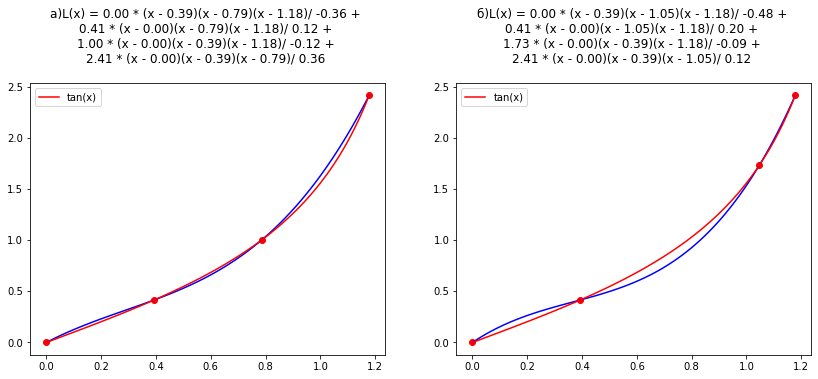

a)
Значение полинома в точке X* : 0.6446067811865475
Значение функции в точке X* : 0.6681786379192989
Погрешность: : 0.023571856732751417
б)
Значение полинома в точке X* : 0.5852508288281995
Значение функции в точке X* : 0.6681786379192989
Погрешность: : 0.08292780909109942


In [806]:
countPoint = 100

lagr1 = Lagrange(Xi_a, f1)
X_a = np.linspace(Xi_a[0],  Xi_a[-1], num=countPoint)
Y_a = [lagr1.L(x) for x in X_a]

lagr2 = Lagrange(Xi_b, f1)
X_b = np.linspace(Xi_a[0],  Xi_b[-1], num=countPoint)
Y_b = [lagr2.L(x) for x in X_b]

Plot1(Xi_a, Yi_a, X_a, Y_a, Xi_b, Yi_b, X_b, Y_b, t1 = lagr1.StrPol(), t2 = lagr2.StrPol())

print('a)')
print(f'Значение полинома в точке X* : {lagr1.L(XX)}')
print(f'Значение функции в точке X* : {f1(XX)}')
print(f'Погрешность: : {abs(lagr1.L(XX) - f1(XX))}')

print('б)')
print(f'Значение полинома в точке X* : {lagr2.L(XX)}')
print(f'Значение функции в точке X* : {f1(XX)}')
print(f'Погрешность: : {abs(lagr2.L(XX) - f1(XX))}')


Интерполяционный многочлен Ньютона 

In [807]:
class Newton:
    def __init__(self, Xi, f):
        self.X = Xi
        self.f = f

    def y(self, x):
        if len(x) == 1:
            return self.f(x[0])
        return ( self.y(x[:-1]) - self.y(x[1:]) ) / (x[0] - x[-1])
        
    def N(self, x):
        N = self.f(self.X[0])
        for i in range(1, len(self.X)):
            ni = 1
            for j in range(i):
                ni *= (x - self.X[j])
            N += self.y(self.X[:i + 1])*ni
        return N
    
    def StrPol(self):
        s = f'N(x) = {self.f(self.X[0]):.{2}f} + '
        for i in range(1, len(self.X)):
            ni = ''
            for j in range(i):
                ni += f'(x - {self.X[j]:.{2}f})'
            if i < len(self.X) - 1: s += f'{self.y(self.X[:i + 1]):.{2}f} * ' + ni + ' + \n'
            else: s += f'{self.y(self.X[:i + 1]):.{2}f} * ' + ni + ' \n'
        return s


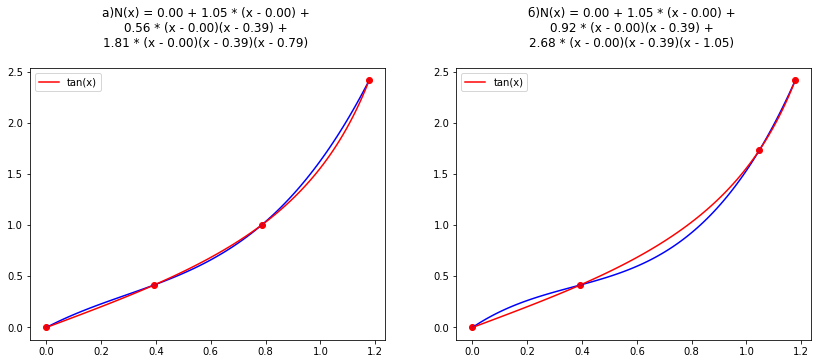

a)
Значение полинома в точке X* : 0.6446067811865476
Значение функции в точке X* : 0.6681786379192989
Погрешность: : 0.023571856732751306
б)
Значение полинома в точке X* : 0.5852508288281997
Значение функции в точке X* : 0.6681786379192989
Погрешность: : 0.0829278090910992


In [808]:
countPoint = 100

newt1 = Newton(Xi_a, f1)
X_a = np.linspace(Xi_a[0],  Xi_a[-1], num=countPoint)
Y_a = [newt1.N(x) for x in X_a]

newt2 = Newton(Xi_b, f1)
X_b = np.linspace(Xi_b[0],  Xi_b[-1], num=countPoint)
Y_b = [newt2.N(x) for x in X_b]

Plot1(Xi_a, Yi_a, X_a, Y_a, Xi_b, Yi_b, X_b, Y_b, t1 = newt1.StrPol(), t2 = newt2.StrPol())

print('a)')
print(f'Значение полинома в точке X* : {newt1.N(XX)}')
print(f'Значение функции в точке X* : {f1(XX)}')
print(f'Погрешность: : {abs(newt1.N(XX) - f1(XX))}')

print('б)')
print(f'Значение полинома в точке X* : {newt2.N(XX)}')
print(f'Значение функции в точке X* : {f1(XX)}')
print(f'Погрешность: : {abs(newt2.N(XX) - f1(XX))}')


### Часть 3_2

#### Задание: 
Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при x = x0 и x = x4 . Вычислить значение функции в точке x = X* .

| i | 0 | 1 | 2 | 3 | 4 |
|:------:|:------:|:------:|:------:|:------:|:------:|
| xi | 0.0 | 0.9 | 1.8 | 2.7 | 3.6 |
| fi | 0.0 | 0.36892 | 0.85408 | 1.7856 | 6.3138 |


$$ X^{*} = 1.5  $$

In [809]:
#TRIDIAGONAL_MATRIX_ALGORITHM

class Tridiagonal_Matrix_Algorithm:
    def __init__(self, A, _d):
        self.n = len(_d)
        self.a = []
        self.b = []
        self.c = []
        self.d = _d
        self.A = A

        self.a.append(0);
        self.b.append(self.A[0][0])
        self.c.append(self.A[0][1])
        for i in range(1, self.n - 1):
            self.a.append(self.A[i][i - 1])
            self.b.append(self.A[i][i])
            self.c.append(self.A[i][i + 1])

        self.a.append(self.A[self.n - 1][self.n - 2])
        self.b.append(self.A[self.n - 1][self.n - 1])
        self.c.append(0)

        self.Make_P_andQ()
        self.x = self.Make_x()

    def Ans(self):
        return self.x

    def Make_P_andQ(self):
        self.p = []
        self.q = []
        self.p.append(- self.c[0] / self.b[0])
        self.q.append(self.d[0] / self.b[0])

        for i in range(1, self.n - 1):
           self.p.append(- self.c[i] / (self.b[i] + self.a[i] * self.p[i - 1]))
           self.q.append((self.d[i] - self.a[i] * self.q[i - 1]) / (self.b[i] + self.a[i] * self.p[i - 1]))


    def Make_x(self):
        self.ans = np.zeros(self.n)

        self.ans[self.n - 1] = (self.d[self.n - 1] - self.a[self.n - 1] * self.q[self.n - 2]) / (self.b[self.n - 1] + self.a[self.n - 1] * self.p[self.n - 2]);

        for i in range(self.n - 2, -1, -1):
            self.ans[i] = self.p[i] * self.ans[i + 1] + self.q[i]

        return self.ans.tolist()


In [810]:
n = 4
Xi = [0.0 , 0.9 , 1.8 , 2.7 , 3.6]
fi = [0.0 , 0.36892 , 0.85408 , 1.7856 , 6.3138 ]

XX = 1.5

h = [0]
for i in range(1, len(Xi)):
    h.append(Xi[i] - Xi[i - 1])

A = [[2 * (h[1] + h[2]) , h[2] , 0]]
_d = [3 * ((fi[2] - fi[1]) / h[2]  - (fi[1] - fi[0]) / h[1] )]

for i in range(3, n):
    ai = np.zeros_like(A[0])
    ai[i - 3] = h[i - 1]
    ai[i - 2] =  2 * (h[i - 1] + h[i])
    ai[i - 1] = h[i]
    A.append(ai.tolist())
    _d.append(3 * ((fi[i] - fi[i - 1]) / h[i]  - (fi[i - 1] - fi[i - 2]) / h[i-1]))

ai = np.zeros_like(A[0])
ai[-1] = 2 * (h[n - 1] + h[n])
ai[-2] = h[n - 1]
A.append(ai.tolist())
_d.append(3 * ((fi[n] - fi[n - 1]) / h[n]  - (fi[n - 1] - fi[n - 2]) / h[n-1]))

print("Трехдиагональная матрица:")
for el in A:
    print(["{0:0.2f}".format(i) for i in el])

Трехдиагональная матрица:
['3.60', '0.90', '0.00']
['0.90', '3.60', '0.90']
['0.00', '0.90', '3.60']


In [811]:
tr = Tridiagonal_Matrix_Algorithm(A, _d)

c  = [0] + tr.Ans()
a = fi[:-1]

b = [ (fi[i] - fi[i - 1])/h[i] - (1/3) * h[i] * (c[i] + 2 * c[i - 1]) for i  in range(1, n)]
b.append((fi[n] - fi[n - 1])/h[n] - (2/3) * h[n] * c[n - 1] )

d = [ (c[i] - c[i - 1]) / (3 * h[i]) for i  in range(1, n)]
d.append( -c[n - 1] / (3 * h[n]))

print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)


a: [0.0, 0.36892, 0.85408, 1.7856]
b: [0.3393785714285715, 0.5509761904761904, 0.30365, 2.956690476190477]
c: [0, 0.23510846560846546, -0.5099153439153437, 3.4577380952380947]
d: [0.08707720948461684, -0.2759347442680774, 1.4695012737605326, -1.2806437389770722]


In [812]:
def f2(x, a, b, c, d, X):
    for i in range(1, len(X)):
        if x >= X[i - 1] and x <= X[i]:
            return a[i-1] + b[i-1] * (x - X[i - 1]) + c[i-1] * (x - X[i - 1])**2 + d[i-1] * (x - X[i - 1])**3

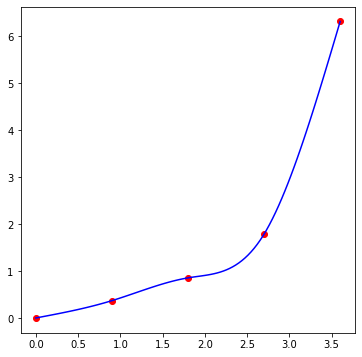

Значение в точке X*: 0.7245428571428569


In [813]:
countPoint = 100
X = np.linspace(Xi[0], Xi[-1], num = countPoint)
Y = [f2(x, a, b, c, d, Xi) for x in X]

Plot2(Xi, fi, X, Y)

print(f"Значение в точке X*: {f2(XX, a, b, c, d, Xi)}")


### Часть 3_3

#### Задание: 
Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

| i | 0 |	1	| 2 |	3 |	4	|5|
|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
| xi |-0.9|	0.0	|0.9|	1.8	|2.7|	3.6 |
| yi | -0.36892	|0.0|	0.36892	|0.85408|	1.7856|	6.3138|

In [814]:
Xi = [-0.9, 0.0, 0.9, 1.8, 2.7, 3.6]
Yi = [-0.36892, 0.0, 0.36892, 0.85408, 1.7856, 6.3138]

In [815]:
def f3(x, a):
    rez = 0;
    for i, ai in enumerate(a):
        rez += ai * (x ** i)
    return rez

class Pol:
    def __init__(self, k, Xi, Yi):
        self.F = np.empty(shape=(len(Xi), k + 1))
        for j, x in enumerate(Xi):
            ph = []
            for i in range(k + 1):
                ph.append(x**i)
            self.F[j] = ph

        self.G = np.dot(self.F.T, self.F)
        self.z = np.dot(self.F.T, np.array(Yi))
    
    def Get_a(self):
        self.a = solve(self.G, self.z)
        return self.a
    
    def SumSqEr(self, Xi, Yi, f):
        sum = 0;
        for i, y in enumerate(Yi): 
            sum += (y - f(Xi[i],self.a))**2
        return sum


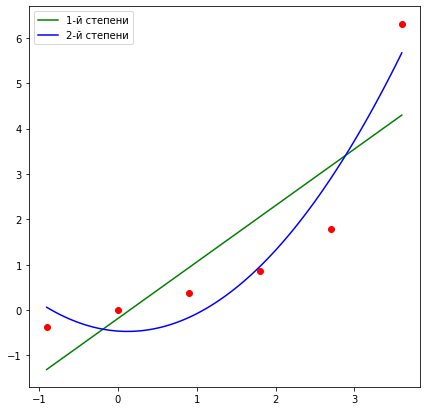

Сумма квадратов ошибок для приближающего многочлена 1-й степени:  8.679022395367621
Сумма квадратов ошибок для приближающего многочлена 2-й степени:  2.355748702034285


In [816]:
pol1 = Pol(1, Xi, Yi)
a1 = pol1.Get_a()

pol2 = Pol(2, Xi, Yi)
a2 = pol2.Get_a()

X = np.linspace(Xi[0], Xi[-1], 100)
Y1 = [f3(x, a1) for x in X]
Y2 = [f3(x, a2) for x in X]

Plot3(Xi, Yi, X, Y1, Y2, "1-й степени", "2-й степени")

print("Сумма квадратов ошибок для приближающего многочлена 1-й степени: ", pol1.SumSqEr(Xi, Yi, f3))
print("Сумма квадратов ошибок для приближающего многочлена 2-й степени: ", pol2.SumSqEr(Xi, Yi, f3))

### Часть 3_4

#### Задание: 
Вычислить первую и вторую производную от таблично заданной функции yi = f(xi), i = 0, 1, 2, 3, 4 в точке X*. 

| i | 0 |	1	| 2 |	3 |	4	|
|:------:|:------:|:------:|:------:|:------:|:------:|
| xi |1.0	|1.5|   	2.0	|2.5  | 	3.0|
| yi | 0.0|	0.40547	|0.69315|	0.91629|	1.0986|

$$ X^{*} = 2 $$

In [817]:
Xi = [1.0, 1.5, 2.0, 2.5, 3.0]
Yi = [0.0, 0.40547, 0.69315, 0.91629, 1.0986]
XX = 2.0


In [818]:
def P1(x, X, Y):
    ind = -1
    for i in range(len(X)):
        if X[i] > x:
            ind = i - 1
            break

    p_left = (Y[ind] - Y[ind - 1]) / (X[ind] - X[ind - 1])
    p_right = (Y[ind + 1] - Y[ind]) / (X[ind + 1] - X[ind])

    p = p_left + (p_right - p_left) * (x - X[ind - 1] + x - X[ind]) /  (X[ind + 1] - X[ind - 1])
    return p

p1 = P1(XX, Xi, Yi)
print("Первая производная в точке X* : ", p1)


Первая производная в точке X* :  0.51082


In [819]:

def P2(x, X, Y):
    ind = -1
    for i in range(len(X)):
        if X[i] > x:
            ind = i - 1
            break

    p_left = (Y[ind] - Y[ind - 1]) / (X[ind] - X[ind - 1])
    p_right = (Y[ind + 1] - Y[ind]) / (X[ind + 1] - X[ind])

    p = (p_right - p_left) * 2 /  (X[ind + 1] - X[ind - 1])

    return p

p2 = P2(XX, Xi, Yi)
print("Вторая производная в точке X* : ", p2)

Вторая производная в точке X* :  -0.25816000000000017


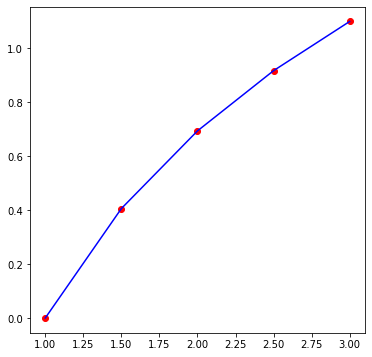

In [820]:
Plot2(Xi, Yi, Xi, Yi)

### Часть 3_5

#### Задание: 
Вычислить определенный интеграл, методами прямоугольников, трапеций, Симпсона с шагами h1, h2 . Оценить погрешность вычислений, используя  Метод Рунге-Ромберга: 

$$\int_{X_0}^{X_k} y \,dx$$

$$ y = \frac{x}{(3x + 4)^3}$$
$$ X_{0} = -1 \ \ \  X_{k} = 1$$
$$ h_{1} = 0.5 \ \ \  X_{2} = 0.25$$

In [821]:
f5 = lambda x: x / (3*x + 4)**2
x0 = -1
xk = 1
h1 = 0.5
h2 = 0.25

Метод прямоугольников

In [822]:
def RectangleMethod(x0, xk, h):
    intg = 0
    xi = x0
    while (xi < xk):
        intg += f5(xi) * h
        xi += h
    return intg 

print(f"c шагом {h1}: ", RectangleMethod(x0, xk, h1))

print(f"c шагом {h2}: ", RectangleMethod(x0, xk, h2))


c шагом 0.5:  -0.5317355371900827
c шагом 0.25:  -0.32543933505178024


Метод трапеций

In [823]:
def TrapezoidalMethod(x0, xk, h):
    intg = 0
    xi = x0
    while (xi < xk):
        intg += (f5(xi) + f5(xi + h)) * h / 2
        xi += h
    return intg

print(f"c шагом {h1}: ", TrapezoidalMethod(x0, xk, h1))

print(f"c шагом {h2}: ", TrapezoidalMethod(x0, xk, h2))


c шагом 0.5:  -0.27663349637375617
c шагом 0.25:  -0.19788831464361697


Метод Симпсона

In [824]:
def SimpsonMethod(x0, xk, h):
    intg = 0
    xi = x0
    while (xi < xk):
        Xi = [xi, xi + h, xi + 2 * h]
        Yi = [f5(x) for x in Xi]

        p = Pol(2, Xi, Yi)
        coef = p.Get_a()

        rez = 0
        for i, cf in enumerate(coef):
            rez += cf * ((xi + 2 * h)**(i + 1)) / (i + 1) - cf * ((xi)**(i + 1)) / (i + 1)

        intg += rez 
        xi += 2 * h
        
    return intg

print(f"c шагом {h1}: ", SimpsonMethod(x0, xk, h1))

print(f"c шагом {h2}: ", SimpsonMethod(x0, xk, h2))

c шагом 0.5:  -0.20557935570922586
c шагом 0.25:  -0.17163992073357232


Оценка погрешности

In [825]:
def RungeRombergMethod(x0, xk, h, r, num):
    if num == 1:
        p = 1
        return (RectangleMethod(x0, xk, h) - RectangleMethod(x0, xk, h * r)) / (r ** p - 1)
    elif num == 2:
        p = 2
        return (TrapezoidalMethod(x0, xk, h) - TrapezoidalMethod(x0, xk, h * r)) / (r ** p - 1)
    elif num == 3:
        p = 4
        return (SimpsonMethod(x0, xk, h) - SimpsonMethod(x0, xk, h * r)) / (r ** p - 1)

print("Метод прямоугольников:")
print(f"Для шага {h1} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h1, 2, 1))
print(f"Для шага {h2} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h2, 2, 1))

print("\nМетод трапеций:")
print(f"Для шага {h1} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h1, 2, 2))
print(f"Для шага {h2} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h2, 2, 2))

print("\nМетод Симпсона:")
print(f"Для шага {h1} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h1, 2, 3))
print(f"Для шага {h2} (апостериорная оценка): ", RungeRombergMethod(x0, xk, h2, 2, 3))

Метод прямоугольников:
Для шага 0.5 (апостериорная оценка):  0.4682644628099173
Для шага 0.25 (апостериорная оценка):  0.20629620213830246

Метод трапеций:
Для шага 0.5 (апостериорная оценка):  0.07105414066453025
Для шага 0.25 (апостериорная оценка):  0.026248393910046398

Метод Симпсона:
Для шага 0.5 (апостериорная оценка):  0.008063417102378139
Для шага 0.25 (апостериорная оценка):  0.0022626289983769033


In [ ]:
class Lagrange:
    def __init__(self, Xi, f):
        self.X = Xi
        self.f = f

    def L(self, x):
        L = 0;
        for j in range(len(self.X)):
            li = 1
            for i in range(len(self.X)):
                if j != i : 
                    li *= (x - self.X[i])
                    li /= (self.X[j] - self.X[i])

            L += self.f(self.X[j])*li
        return L
    
    def StrPol(self):
        s = 'L(x) = '
        for j in range(len(self.X)):
            li = ''
            li_ = 1;
            for i in range(len(self.X)):
                if j != i : 
                    li += f"(x - {self.X[i]:.{2}f})"
                    li_ *= (self.X[j] - self.X[i])

            if j < len(self.X) - 1: s += f"{self.f(self.X[j]):.{2}f} * " + li + f"/ {li_:.{2}f} + \n"
            else: s += f"{self.f(self.X[j]):.{2}f} * " + li + f"/ {li_:.{2}f} \n"
        return s

def S(X, X1):
    return np.sum(np.array(X) - np.array(X1)) / len(X1)

lagr1 = Lagrange(Xn, f)
X_a = np.linspace(-1, 1, num = 100)
Y_a = [lagr1.L(x) for x in X_a]


Plot1(Xn, Yn, X_a, Y_a, Xn, Yn, X, Y, f, t1 = "Лагранж", t2 = "Вельвьет")